## Functions


In the last notebook, we talked about modeling data with functions. A **function** is one of the most fundamental concepts in computing (and also in mathematics). 

A function is a piece of a program that receives **input arguments**, processes them by doing certain calculations on them, and returns **outputs**.

For example, we might have a function `g` that takes a number as an input and returns the square of that number as an output. How can we define this function `g` on a computer? Julia gives us a few different ways to do this.

### Defining functions

Firstly, we could write `g` as follows:

In [1]:
g(x) = x^2

g (generic function with 1 method)

In [2]:
a = "Machine is learning is fun "
g(a)

"Machine is learning is fun Machine is learning is fun "

Alternatively, we could declare this function using the `function` and `end` keywords:

In [3]:
function g1(x)
    return x^2
end

g1 (generic function with 1 method)

The third way we could have declared this function is as an "anonymous" or "lambda" function. "Anonymous" functions are functions that truly don't need names! For example, we could have declared a function that squares its input as

In [4]:
(x -> x^2)("I ♡ Julia. ") # \heartsuit + <tab>

"I ♡ Julia. I ♡ Julia. "

Now that we've done that, we can't access the function `x -> x^2` again because we have no name to call! That seems a little silly, doesn't it?

Actually, there are times where functions without names are useful to us. We'll see that later in this notebook. For now, note that you have the *option* to access an "anonymous" function later by binding a variable to it when you declare it. For example,

In [5]:
g = x -> x^2

ErrorException: invalid redefinition of constant g

This syntax says, "I want to use the variable `g` to access a function that takes some input called `x` and maps that input to the square of `x`.

## An important sigmoidal function

A particular function that is used a lot in machine learning is a so-called "sigmoidal" function (meaning a function that is S-shaped, i.e. the graph of the function looks like an `S`).

The sigmoid function that we will use is given the name $\sigma$, and is defined by the following mathematical expression:

$$\sigma(x) := \frac{1}{1 + e^{-x}}.$$
Where $e$ is a constant knowned as the [Euler's Number](https://en.wikipedia.org/wiki/E_(mathematical_constant)). Type `\euler<TAB>` to access the constant.

In [6]:
σ(w*x) = 1/ (1+ℯ^(-w*x))

ErrorException: syntax: "(w * x)" is not a valid function argument name around c:\Users\jwei\Documents\GitHub\Julia\JuliaTutorials\introductory-tutorials\broader-topics-and-ecosystem\intro-to-ml\04. Tools - Functions.ipynb:1

#### Exercise 1

Use the first syntax given above to define the function `σ` in Julia. Note that Julia actually allows us to use the symbol σ as a variable name! To do so, type `\sigma<TAB>` in the code cell.

In [8]:
σ = x -> 1 / (1 + exp(-x))

#15 (generic function with 1 method)

## Plotting functions

Let's draw the function σ to see what it looks like. Throughout this course, we'll use the Julia package `Plots.jl` for all of the graphics. This package provides a flexible syntax for plotting, in which options to change attributes like the width of the lines used in the figure are given as named keyword arguments.

In addition, it allows us to use different "backends", which are the other libraries that actually carry out the plotting following the instructions from `Plots.jl`.

In [9]:
using Plots
gr()   # use the PlotlyJS "backend" (plotting library)

Plots.GRBackend()

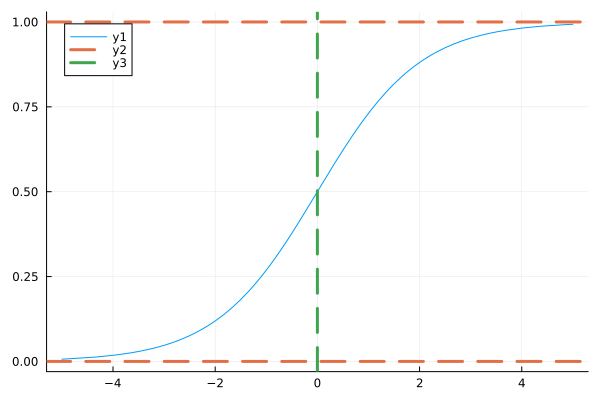

In [10]:
plot(σ, -5, 5)

hline!([0, 1], ls=:dash, lw=3)  # add horizontal lines at 0 and 1, with dashed style and linewidth 3
vline!([0], ls=:dash, lw=3)     # add a vertical line at 0

We can think of $\sigma$ as a smooth version of a step or threshold function (often called a "Heaviside" function). To see this, let's modify the steepness of the jump in $\sigma$ and compare it to the Heaviside function; we'll see how all this works in more detail later:

In [18]:
using Interact
using WebIO

In [19]:
heaviside(x) = x < 0 ? 0.0 : 1.0

heaviside (generic function with 1 method)

In [20]:
@manipulate for w in 0.1:0.1:20
    plot(x -> σ(w*x), -5, 5, label="sigma", lw=2)
    plot!(heaviside, ls=:dash, label="step")
end

(div
  Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["w"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\jwei\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\jwei\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\jwei\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\jwei\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\jwei\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000020112d26100, Task (runnable) @0x0000020112d26100), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 6320240, 139779710648329)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\",\"1.1\",\"1.2\",\"1.3\",\"1.4\",\"1.5\",\"1.6\",\"1.7\

This particular function takes any real number as input, and gives an output between $0$ and $1$. It is continuous and smooth.

#### Exercise 2

Declare the sigmoid function above as an anonymous function with a different name.

### Mutating functions: `...!`

To generate our plot of σ above, we used some functions that end with `!`. What does a `!` at the end of a function name mean in Julia?

Functions that change or modify their inputs are called **mutating functions**. But wait, don't all functions do that?

No, actually. Functions typically take *inputs* and use those *inputs* to generate *outputs*, but the inputs themselves usually don't actually get changed by a function. For example, copy and execute the following code:

```julia
v1 = [9, 4, 7, 11]
v2 = sort(v1)
```

`v2` is a sorted version of `v1`, but after calling `sort`, `v1` is still unsorted.

However, now trying adding an exclamation point after `sort` and executing the following code:

```julia
sort!(v1)
```

Look at the values in `v1` now!

This time, the original vector itself was changed (mutated), and is now sorted. Unlike `sort`, `sort!` is a mutating function. Did the `!` make `sort!` mutating? Well, no, not really. In Julia, `!` indicates mutating functions by convention. When the author of `sort!` wrote `sort!`, they added a `!` to let you to know that `sort!` is mutating, but the `!` isn't what makes a function mutating or non-mutating in the first place.
 
#### Exercise

Some of our plotting commands end with `!`. Copy and execute the following code:

```julia
r = -5:0.1:5
g(x) = x^2
h(x) = x^3
plot(r, g, label="g")
plot!(r, h, label="h")
```

Then change the code slightly to remove the `!` after `plot!(r, h)`. How does this change your output? What do you think it means to add `!` after plotting commands?

## Pointwise application of functions, `.(...)` (known as "broadcasting")

We saw in a previous notebook that we needed to add `.` after the names of some functions, as in 

```julia
green_amount = mean(Float64.(green.(apple)))
```

What are those extra `.`s really doing?

When we add a `.` after a function's name, we are telling Julia that we want to "**broadcast**" that function over the inputs passed to the function. This means that we want to apply that function *element-wise* over the inputs; in other words, it will apply the function to each element of the input, and return an array with the newly-calculated values.

For example, copy and execute the following code:
```julia
g.(r)
```
Since the function `g` squares it's input, this squares all the elements of the range `r`.

What happens if instead we just call `g` on `r` via

```julia
g(r)
```
? Try this out and see what happens.

In [ ]:
x = [1 2 3;4 5 6]
f(t) = √t + 5
f.(x)

You should see an error message after calling `g(r)`, which says that Julia cannot multiply two vectors. When we call `g(r)`, we ask Julia to multiply `r` by `r`. When we call `g.(r)`, we ask Julia to multiply *each element* in `r` by itself.

#### Exercise 3

Copy and execute the following code to get the type of the object `numbers = [1, 2, "three", 4.0]`:

```julia
numbers = [1, 2, "three", 4.0]
typeof(numbers)
```

What is the type of `numbers`?

#### Exercise 4

Broadcast `typeof` over `numbers` to see what the types of the elements stored inside `numbers` are.

#### Exercise 5

Write a `for` loop that applies `g` to each of the elements of `r` and prints the results. Verify that the numbers printed by this `for` loop are equal to the entries of the output of `g.(r)`.

#### Exercise 6

Define a range `xs` between -5 and 5 with steps of 0.5. 
Apply the $\sigma$ function pointwise to this range and define `ys` as the result.
What does the result look like? Plot these as points and join them with lines.

Make the plot interactive where you can vary the step size. Fix the range of the plot in the `x` and `y` directions using the functions `xlims!` and `ylims!`.